In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import utils.mp1 as generator

Using TensorFlow backend.


In [2]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import optimizers
from keras.utils import to_categorical, normalize
from keras.regularizers import l2

## 3) Simple Classification

__Generate dataset__

In [3]:
[X_train, Y_train] = generator.generate_dataset_classification(800, 20)

  1%|          | 7/800 [00:00<00:13, 60.96it/s]

Creating data:


100%|██████████| 800/800 [00:10<00:00, 73.99it/s]


Quick look at random samples from the dataset

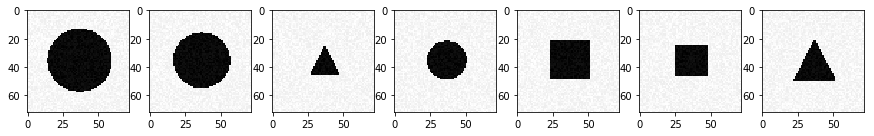

In [4]:
batch_size = 7
fig, ax = plt.subplots(1, batch_size, figsize=(15, batch_size * 5))

random_batch = random.choices(X_train, k=batch_size)
for i, item in enumerate(random_batch):
    ax[i].imshow(item.reshape(generator.IMAGE_SIZE, -1), cmap='gray')

Quick look at labels distribution

In [5]:
print(np.unique(Y_train, return_counts=True))

(array([0., 1., 2.]), array([261, 264, 275]))


Fairly distributed

__Model__

No need to go deep when shallow works fine, for such a simple task we will use a single layer

In [6]:
input_shape = X_train[0].shape
dense_units = 3

In [7]:
# Input layer
x_in = Input(shape=input_shape)

# Fully connected
x = Dense(units=dense_units, activation='softmax')(x_in)

model = Model(inputs=[x_in], outputs=[x])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [9]:
simple_model_path = "models/simple_model_untrained.h5"
model.save(simple_model_path)

In [10]:
y_train = to_categorical(Y_train)

__Training with SGD optimizer__

In [11]:
model_sgd = load_model(simple_model_path)

sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=0.6, nesterov=True)
model_sgd.compile(loss='categorical_crossentropy', 
                  metrics = ['accuracy'],
                  optimizer=sgd)

/Users/dieze/anaconda/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
loss = model_sgd.fit(X_train, 
                     y_train,
                     batch_size = 32,
                     epochs = 12,
                     validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/12
640/640 [==============================] - 0s 246us/step - loss: 1.0229 - acc: 0.4984 - val_loss: 0.7994 - val_acc: 0.5938
Epoch 2/12
640/640 [==============================] - 0s 81us/step - loss: 0.7295 - acc: 0.6656 - val_loss: 0.6549 - val_acc: 0.7375
Epoch 3/12
640/640 [==============================] - 0s 54us/step - loss: 0.5977 - acc: 0.7750 - val_loss: 0.5454 - val_acc: 0.8438
Epoch 4/12
640/640 [==============================] - 0s 72us/step - loss: 0.4998 - acc: 0.8453 - val_loss: 0.4869 - val_acc: 0.9187
Epoch 5/12
640/640 [==============================] - 0s 58us/step - loss: 0.4383 - acc: 0.8938 - val_loss: 0.4876 - val_acc: 0.7812
Epoch 6/12
640/640 [==============================] - 0s 69us/step - loss: 0.4276 - acc: 0.8578 - val_loss: 0.4217 - val_acc: 0.8875
Epoch 7/12
640/640 [==============================] - 0s 56us/step - loss: 0.3703 - acc: 0.9125 - val_loss: 0.4077 - val_acc: 0.8750
Epoch 8/12
640/640 [==

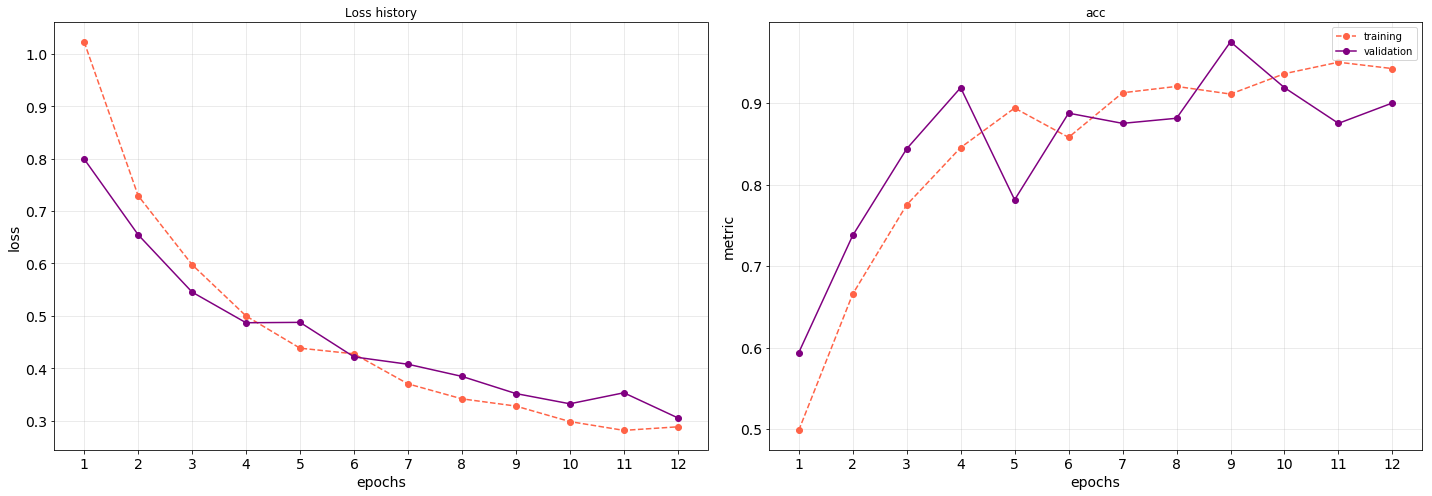

In [13]:
generator.plotLossHistory(loss, metric='acc')
plt.show()

__Training with Adam optimizer__

In [58]:
model_adam = load_model(simple_model_path)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.95, epsilon=None, decay=0.0, amsgrad=False)
model_adam.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

/Users/dieze/anaconda/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [59]:
loss = model_adam.fit(X_train, 
                      y_train,
                      batch_size = 32,
                      epochs = 10,
                      validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/10
640/640 [==============================] - 0s 543us/step - loss: 1.1371 - acc: 0.5250 - val_loss: 0.8354 - val_acc: 0.6750
Epoch 2/10
640/640 [==============================] - 0s 69us/step - loss: 0.4249 - acc: 0.8516 - val_loss: 0.3234 - val_acc: 0.9625
Epoch 3/10
640/640 [==============================] - 0s 84us/step - loss: 0.3186 - acc: 0.8719 - val_loss: 0.2869 - val_acc: 0.8938
Epoch 4/10
640/640 [==============================] - 0s 71us/step - loss: 0.2591 - acc: 0.8875 - val_loss: 0.1891 - val_acc: 0.9375
Epoch 5/10
640/640 [==============================] - 0s 80us/step - loss: 0.1910 - acc: 0.9203 - val_loss: 0.1675 - val_acc: 0.9625
Epoch 6/10
640/640 [==============================] - 0s 94us/step - loss: 0.1172 - acc: 0.9891 - val_loss: 0.1099 - val_acc: 1.0000
Epoch 7/10
640/640 [==============================] - 0s 78us/step - loss: 0.0857 - acc: 0.9969 - val_loss: 0.1003 - val_acc: 1.0000
Epoch 8/10
640/640 [==

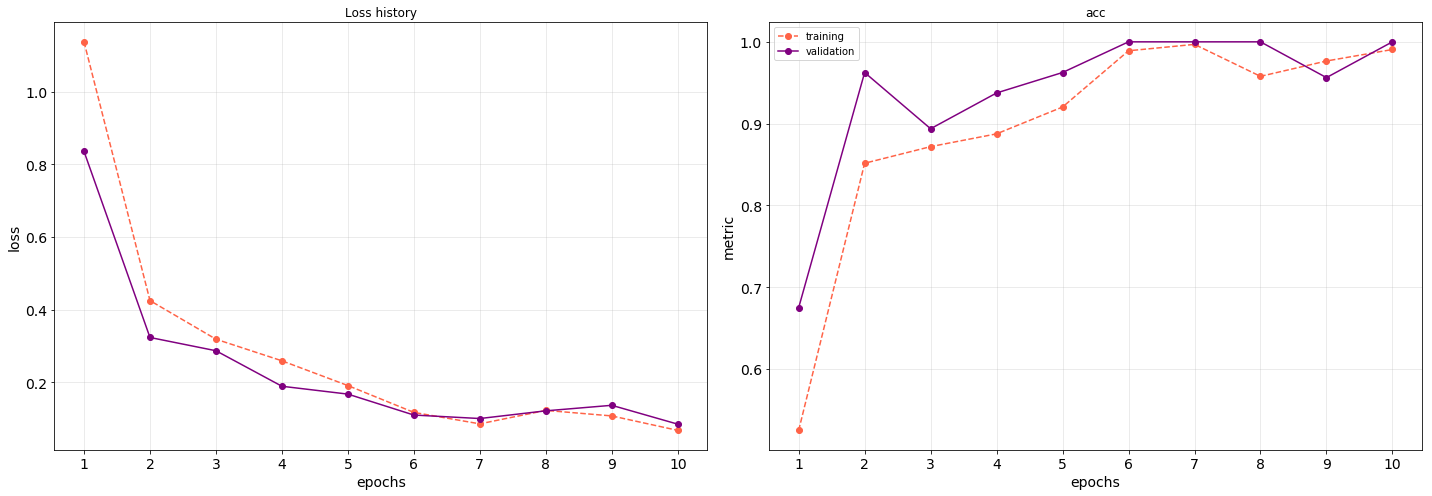

In [60]:
generator.plotLossHistory(loss, metric='acc')
plt.show()

## 4) Visualize the solution

In [61]:
weights_sgd = model_sgd.get_weights()[0]
weights_adam = model_adam.get_weights()[0]

Text(0.5,1,'Adam - Triangle')

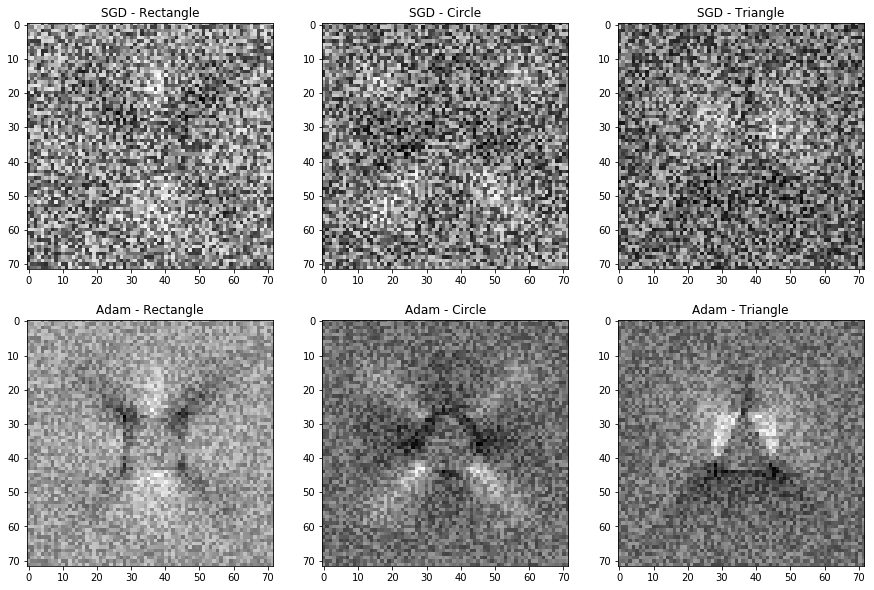

In [62]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(weights_sgd[:,0].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 0].set_title("SGD - Rectangle")
ax[0, 1].imshow(weights_sgd[:,1].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 1].set_title("SGD - Circle")
ax[0, 2].imshow(weights_sgd[:,2].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 2].set_title("SGD - Triangle")

ax[1, 0].imshow(weights_adam[:,0].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 0].set_title("Adam - Rectangle")
ax[1, 1].imshow(weights_adam[:,1].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 1].set_title("Adam - Circle")
ax[1, 2].imshow(weights_adam[:,2].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 2].set_title("Adam - Triangle")

- Pixels activation is much clearer when Adam is used, consistent with its superior performances
- Pixel activation is consistent with the shape it is predicting :
    - Rectangle pixel activation focuses on lateral pixels and doesn't activate diagonal ones
    - Inversely, ircle mainly focuses on diagonal pixel as circles tends to spread more than rectangle and triangles toward diagonal
    - Triangles activate edges pixels and don't trigger bissector's axis pixels

## 5) A More Difficult Classification Problem

We know allow shapes to move

In [63]:
[X_train, Y_train] = generator.generate_dataset_classification(800, 20, True)
y_train = to_categorical(Y_train)

  1%|          | 7/800 [00:00<00:11, 66.55it/s]

Creating data:


100%|██████████| 800/800 [00:10<00:00, 78.56it/s] 


In [64]:
model_adam = load_model(simple_model_path)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.95, epsilon=None, decay=0.0, amsgrad=False)
model_adam.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

loss = model_adam.fit(X_train, 
                      y_train,
                      batch_size = 32,
                      epochs = 24,
                      validation_split=0.2)

/Users/dieze/anaconda/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Train on 640 samples, validate on 160 samples
Epoch 1/24
640/640 [==============================] - 0s 598us/step - loss: 1.9300 - acc: 0.3203 - val_loss: 1.4526 - val_acc: 0.3312
Epoch 2/24
640/640 [==============================] - 0s 73us/step - loss: 1.1032 - acc: 0.4359 - val_loss: 0.9677 - val_acc: 0.5188
Epoch 3/24
640/640 [==============================] - 0s 73us/step - loss: 1.0677 - acc: 0.4844 - val_loss: 1.0747 - val_acc: 0.4750
Epoch 4/24
640/640 [==============================] - 0s 65us/step - loss: 1.0301 - acc: 0.5031 - val_loss: 1.1337 - val_acc: 0.4875
Epoch 5/24
640/640 [==============================] - 0s 179us/step - loss: 1.1159 - acc: 0.4719 - val_loss: 1.0578 - val_acc: 0.4875
Epoch 6/24
640/640 [==============================] - 0s 118us/step - loss: 0.9083 - acc: 0.5328 - val_loss: 0.8704 - val_acc: 0.5062
Epoch 7/24
640/640 [==============================] - 0s 88us/step - loss: 0.8567 - acc: 0.5797 - val_loss: 0.8697 - val_acc: 0.5188
Epoch 8/24
640/640 [

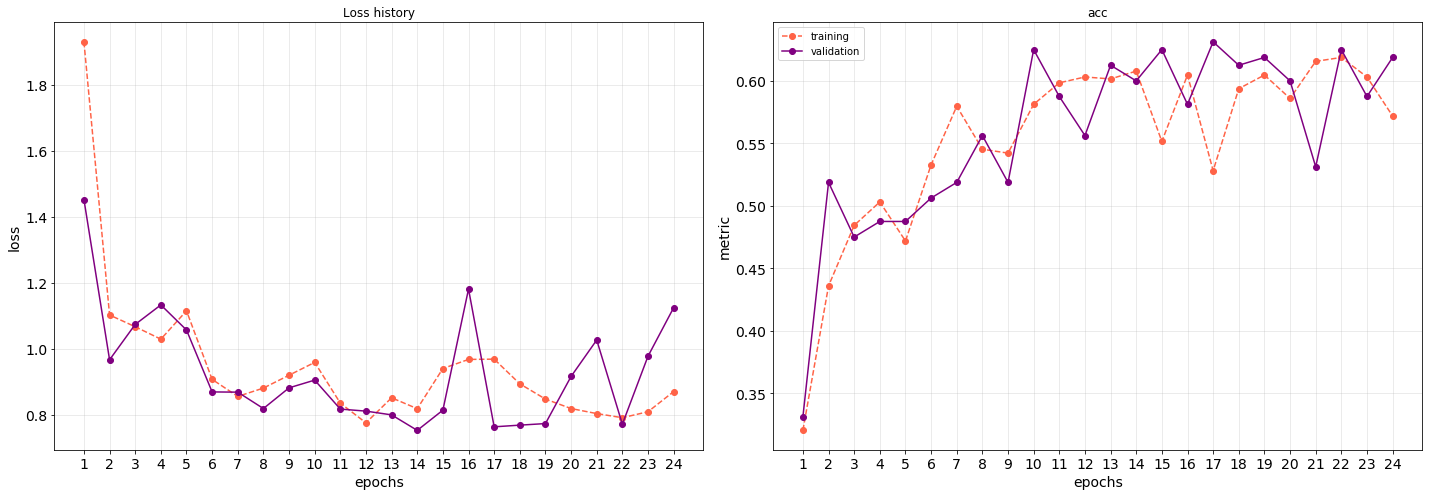

In [66]:
generator.plotLossHistory(loss, metric='acc')
plt.show()

Now that the shapes aren't centered anymore, our elementary network struggles to reach the same accuracy as previously

__Evaluate on testing set__

In [67]:
[X_test, Y_test] = generator.generate_test_set_classification()

  2%|▏         | 7/300 [00:00<00:04, 66.78it/s]

Creating data:


100%|██████████| 300/300 [00:04<00:00, 62.10it/s]


In [69]:
# loss and accuracy
model_adam.evaluate(X_test, Y_test)

Loss ----- Accuracy
300/300 [==============================] - 0s 45us/step


[1.1803178151448568, 0.6033333325386048]

Consistent with the plots above, the obtained loss is greater than the one obtained for the centered shapes and accuracy is lower. Time has come to get deep and move on from this single-layer architecture

### Convnet

For the convolutional network, the number of parameter for training rises (1 184 419 vs 15 555 in the previous model), we hence need to increase the size of the dataset in order to reach a satisfying model

In [70]:
[X_train, Y_train] = generator.generate_dataset_classification(2000, 20, True)
y_train = to_categorical(Y_train)

  0%|          | 7/2000 [00:00<00:30, 64.77it/s]

Creating data:


100%|██████████| 2000/2000 [00:26<00:00, 76.33it/s]


In [382]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, LeakyReLU, concatenate
from keras.callbacks import EarlyStopping

In [72]:
# Input layer
x_in = Input(shape=(generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1))

# Convolutional layer
x = Conv2D(16, kernel_size=5)(x_in)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.5)(x)

# Fully connected
x = Dense(units=dense_units, activation='softmax')(x)

conv_model = Model(inputs=[x_in], outputs=[x])

In [73]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 68, 68, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1183808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [74]:
conv_model.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

loss = conv_model.fit(X_train.reshape(2000, 72, 72, 1), 
                      y_train,
                      batch_size = 100,
                      epochs = 40,
                      validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 5s 3ms/step - loss: 1.4723 - acc: 0.3750 - val_loss: 1.0546 - val_acc: 0.5800
Epoch 2/40
1600/1600 [==============================] - 4s 3ms/step - loss: 1.0325 - acc: 0.4487 - val_loss: 0.9762 - val_acc: 0.6750
Epoch 3/40
1600/1600 [==============================] - 4s 3ms/step - loss: 0.9704 - acc: 0.4906 - val_loss: 0.9055 - val_acc: 0.6400
Epoch 4/40
1600/1600 [==============================] - 7s 4ms/step - loss: 0.8773 - acc: 0.5744 - val_loss: 0.8495 - val_acc: 0.6375
Epoch 5/40
1600/1600 [==============================] - 6s 4ms/step - loss: 0.8153 - acc: 0.6312 - val_loss: 0.7860 - val_acc: 0.6725
Epoch 6/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.7535 - acc: 0.6650 - val_loss: 0.7783 - val_acc: 0.6450
Epoch 7/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.7244 - acc: 0.6813 - val_loss: 0.7232 - val_acc: 0.7125
Epoch 8/40
1600

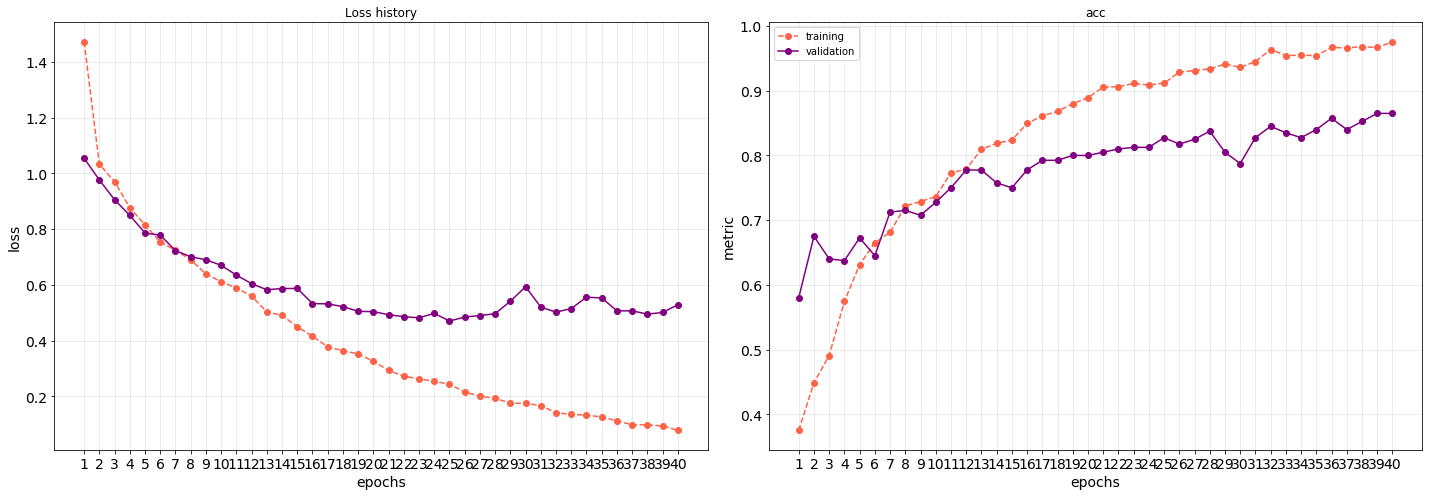

In [76]:
generator.plotLossHistory(loss, metric='acc')
plt.show()

In [78]:
# loss and accuracy
conv_model.evaluate(X_test.reshape(X_test.shape[0], 72, 72, 1), Y_test)

300/300 [==============================] - 0s 1ms/step


[0.46380533814430236, 0.8666666674613953]

Performances are much better with the convolutional network, and we could pretend to reach even better accuracy by increasing the size of the dataset for example

## 6) A Regression Problem

We now want to tackle another problem : predicting the coordinate of a triangle vertices given its image

__Generate datasets__

In [232]:
[X_train, Y_train] = generator.generate_dataset_regression(10000, 20)
[X_test, Y_test] = generator.generate_test_set_regression()

  0%|          | 6/10000 [00:00<02:46, 59.87it/s]

Creating data:


  2%|▏         | 6/300 [00:00<00:04, 59.84it/s]

Creating data:


100%|██████████| 300/300 [00:03<00:00, 82.11it/s]


__Preprocess data__

Preprocessing steps :
- Normalize dataset : centering data in [-1, 1] 
- Sort vertices : indeed if not sorted, two equals set of vertices might be represented by different arrays. Here we choose to sort them by the first coordinate

In [233]:
def normalize_dataset(X, y):
    max_val = np.max(X)
    min_val = np.min(X)
    X = (X - min_val) / (max_val - min_val)
    y = (y - min_val) / (max_val - min_val)
    X = X - 0.5
    y = y - 0.5
    return [X, y]

def sort_vertices(vertices_array):
    vertices = list(vertices_array.reshape(3, 2))
    vertices.sort(key=lambda x: x[0])
    return np.ravel(vertices)

In [234]:
y_train = np.apply_along_axis(sort_vertices, axis=1, arr=Y_train)
y_test = np.apply_along_axis(sort_vertices, axis=1, arr=Y_test)

[X_train, y_train] = normalize_dataset(X_train, y_train)
[X_test, y_test] = normalize_dataset(X_test, y_test)

__Generate model__

According the sorting vertices instinct, it would seem natural to have 3 separate dense branch after the convolutional block : each branch would hence specialze in detecting a given edge following the x axis

In [235]:
n_sample = len(X_train)
input_shape = (generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1)
reg_param = 1e-6

In [236]:
x_in = Input(shape=input_shape)

# Convolutional blocks
x = Conv2D(16, kernel_size=6, kernel_regularizer=l2(reg_param))(x_in)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, kernel_size=3)(x)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, kernel_size=3)(x)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)


# First branch
x1 = Dense(36, activation="relu")(x)
x1 = Dropout(0.5)(x1)
x1 = Dense(units=2)(x1)

# Second branch
x2 = Dense(36, activation="relu")(x)
x2 = Dropout(0.5)(x2)
x2 = Dense(units=2)(x2)

# Third branch
x3 = Dense(36, activation="relu")(x)
x3 = Dropout(0.5)(x3)
x3 = Dense(units=2)(x3)


# Output layer
x_out = concatenate([x1, x2, x3])

reg_model = Model(inputs=[x_in], outputs=[x_out])

In [237]:
reg_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 67, 67, 16)   592         input_24[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_26 (LeakyReLU)      (None, 67, 67, 16)   0           conv2d_52[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_52 (MaxPooling2D) (None, 33, 33, 16)   0           leaky_re_lu_26[0][0]             
__________________________________________________________________________________________________
conv2d_53 

In [238]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.995, epsilon=None, decay=0.01, amsgrad=False) 
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=1e-4,
                               patience=2)

In [240]:
reg_model.compile(loss='mean_squared_error', 
                   optimizer=adam)

loss = reg_model.fit(X_train.reshape((n_sample,) + input_shape), 
                      y_train,
                      batch_size = 256,
                      epochs = 100,
                      validation_split=0.2,
                      callbacks=[early_stopping])

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 48s 6ms/step - loss: 0.0516 - val_loss: 0.0288
Epoch 2/100
8000/8000 [==============================] - 41s 5ms/step - loss: 0.0340 - val_loss: 0.0212
Epoch 3/100
8000/8000 [==============================] - 43s 5ms/step - loss: 0.0278 - val_loss: 0.0165
Epoch 4/100
8000/8000 [==============================] - 42s 5ms/step - loss: 0.0239 - val_loss: 0.0137
Epoch 5/100
8000/8000 [==============================] - 42s 5ms/step - loss: 0.0218 - val_loss: 0.0127
Epoch 6/100
8000/8000 [==============================] - 42s 5ms/step - loss: 0.0201 - val_loss: 0.0118
Epoch 7/100
8000/8000 [==============================] - 42s 5ms/step - loss: 0.0194 - val_loss: 0.0111
Epoch 8/100
8000/8000 [==============================] - 42s 5ms/step - loss: 0.0185 - val_loss: 0.0107
Epoch 9/100
8000/8000 [==============================] - 43s 5ms/step - loss: 0.0179 - val_loss: 0.0105
Epoch 10/100
800

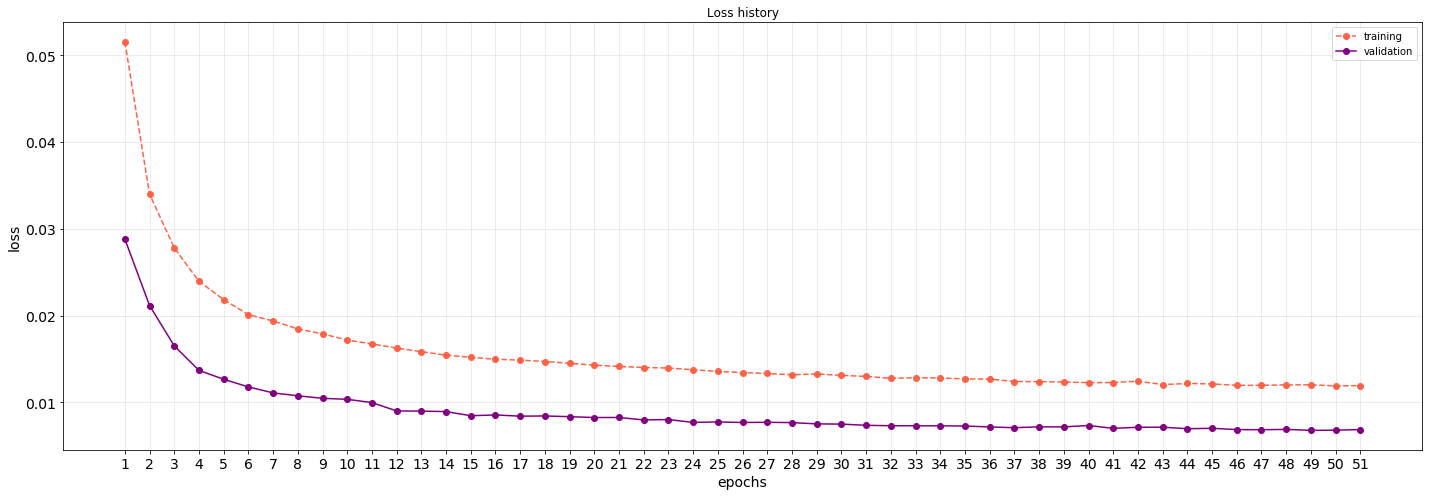

In [241]:
fig, ax1= plt.subplots(figsize=(20, 7))
epochs = range(1, len(loss.history['loss']) + 1)
color1 = 'tomato'
color2 = 'purple'
fontsize = 14
ax1.set_xlabel('epochs', fontsize=fontsize)
ax1.set_ylabel('loss', fontsize=fontsize)
ax1.plot(epochs, loss.history['loss'], '--o', color=color1, label="training")
ax1.plot(epochs, loss.history['val_loss'], '-o', color=color2, label="validation")
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)
ax1.set_xticks(epochs)
ax1.grid(alpha=0.3)
ax1.set_title("Loss history")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

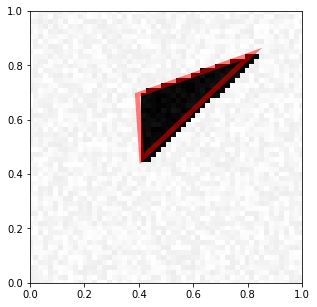

In [225]:
generator.visualize_prediction(X_train[18], Y_train[18])

In [270]:
pred = reg_model.predict(X_train[10].reshape((1,) + input_shape)) + 0.5
generator.visualize_prediction(X_train[10], pred)

IndexError: index 10 is out of bounds for axis 0 with size 1

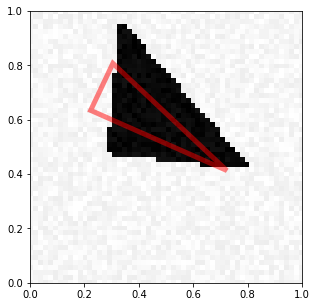

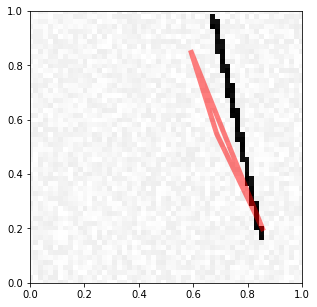

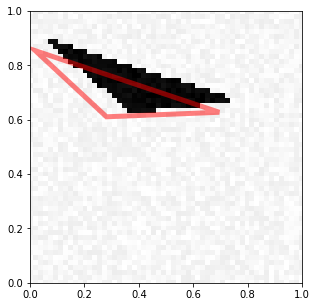

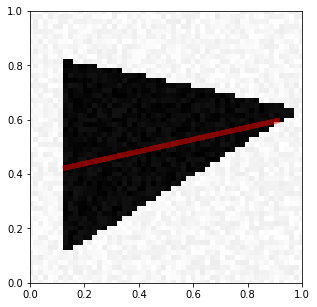

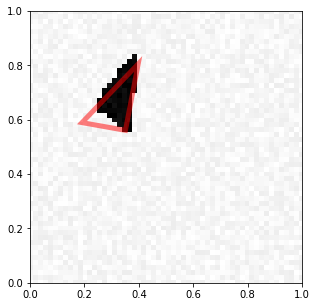

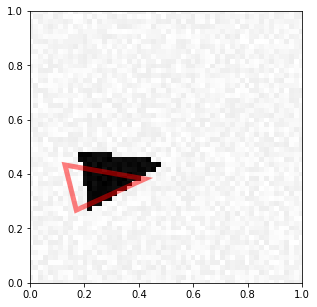

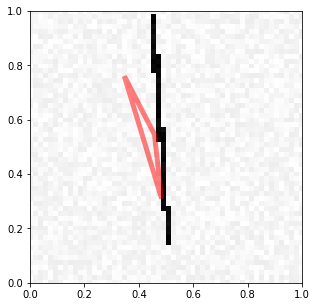

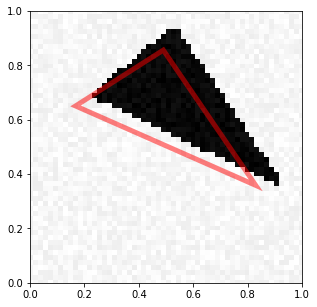

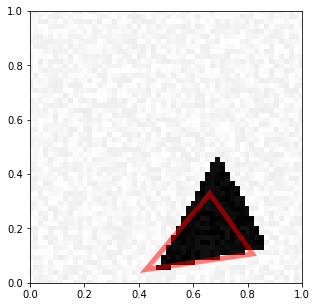

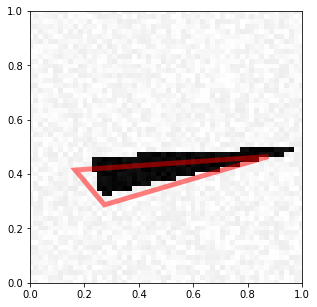

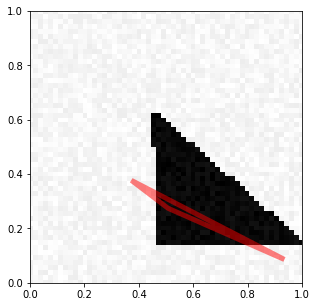

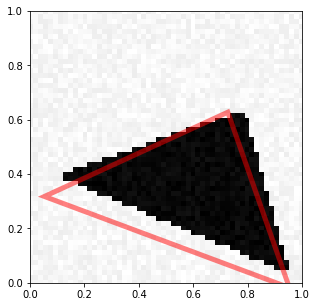

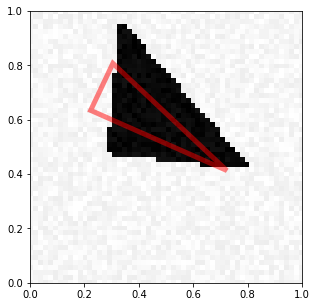

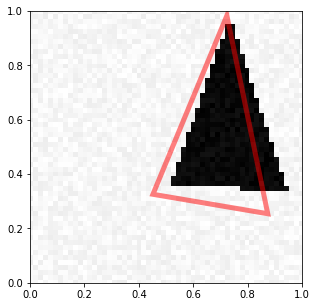

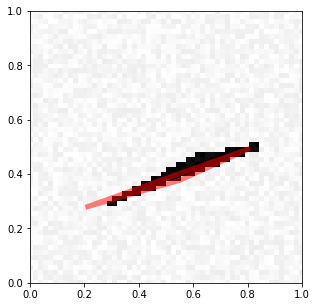

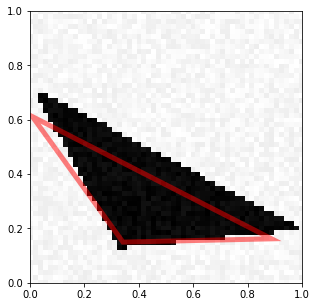

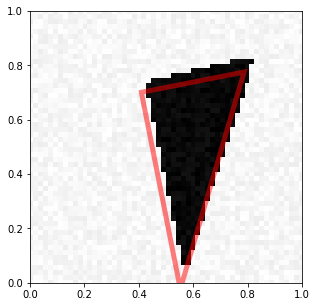

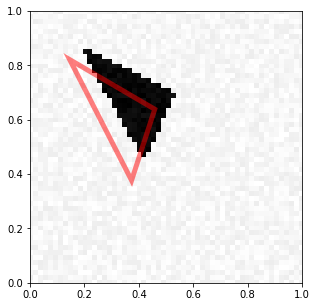

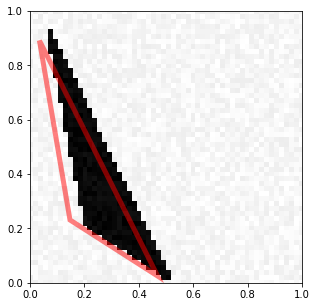

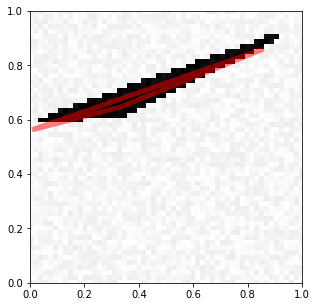

In [247]:
n_sample = 20
test_samples = random.choices(X_test, k=n_sample)
for sample in test_samples:
    pred = reg_model.predict(sample.reshape((1,) + input_shape)) + 0.5
    generator.visualize_prediction(sample, pred)

## 7) Image Denoising

__Generate denoising dataset__

In [248]:
from tqdm import tqdm

In [291]:
def generate_denoising_dataset(nb_samples, max_noise, min_noise=20, free_location=True):
    # Getting im size
    im_size = generator.generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples, im_size])
    Y = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in tqdm(range(nb_samples)):
        category = np.random.randint(3)
        noise = (max_noise - min_noise) * np.random.rand() + min_noise
        seed = np.random.randint(10 * nb_samples)
        np.random.seed(seed)
        if category == 0:
            X[i] = generator.generate_a_rectangle(noise=noise, free_location=free_location)
            np.random.seed(seed)
            Y[i] = generator.generate_a_rectangle(free_location=free_location)
        elif category == 1:
            X[i] = generator.generate_a_disk(noise=noise, free_location=free_location)
            np.random.seed(seed)
            Y[i] = generator.generate_a_disk(free_location=free_location)
        else:
            [X[i], _] = generator.generate_a_triangle(noise=noise, free_location=free_location)
            np.random.seed(seed)
            [Y[i], _] = generator.generate_a_triangle(free_location=free_location)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [292]:
[X_train, Y_train] = generate_denoising_dataset(1, max_noise=MAX_NOISE)

100%|██████████| 1/1 [00:00<00:00, 28.40it/s]

Creating data:


In [330]:
MAX_NOISE = 100
[X_train, Y_train] = generate_denoising_dataset(2000, max_noise=MAX_NOISE)
[X_test, Y_test] = generate_denoising_dataset(200, max_noise=MAX_NOISE)

  0%|          | 5/2000 [00:00<00:43, 46.27it/s]

Creating data:


  1%|          | 2/200 [00:00<00:10, 18.11it/s]

Creating data:


100%|██████████| 200/200 [00:09<00:00, 41.43it/s]


__Generate Hourglass-like model__

In [331]:
from keras.layers import BatchNormalization, concatenate, ReLU, UpSampling2D

In [346]:
n_sample = len(X_train)
input_shape = (generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1)
reg_param = 1e-6

In [352]:
# Input layer
x_in = Input(shape=input_shape)

# Down sample path
x_enc1 = Conv2D(16, kernel_size=5, padding='same')(x_in)
x_enc1 = ReLU()(x_enc1)
x_enc1 = MaxPooling2D(pool_size=(2,2))(x_enc1)

x_enc2 = Conv2D(32, kernel_size=3, padding='same')(x_enc1)
x_enc2 = ReLU()(x_enc2)
x_enc2 = MaxPooling2D(pool_size=(2,2))(x_enc2)

# Up sample path
x_dec = Conv2D(16, kernel_size=3, padding='same')(x_enc2)
x_dec = ReLU()(x_dec)
x_dec = UpSampling2D()(x_dec)
x_dec = concatenate([x_dec, x_enc1])

x_dec = Conv2D(16, kernel_size=3, padding='same')(x_dec)
x_dec = ReLU()(x_dec)
x_dec = UpSampling2D()(x_dec)
x_dec = concatenate([x_dec, x_in])

x_dec = Conv2D(1, kernel_size=3, padding='same', activation="sigmoid")(x_dec)

hourglass_model = Model(inputs=[x_in], outputs=[x_dec])

In [348]:
hourglass_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 72, 72, 16)   416         input_40[0][0]                   
__________________________________________________________________________________________________
re_lu_23 (ReLU)                 (None, 72, 72, 16)   0           conv2d_98[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_70 (MaxPooling2D) (None, 36, 36, 16)   0           re_lu_23[0][0]                   
__________________________________________________________________________________________________
conv2d_99 

In [401]:
x_in = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x_out = Conv2D(1, (3, 3), padding='same', activation="sigmoid")(x)

hourglass_model = Model(inputs=[x_in], outputs=[x_out])


In [402]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0001, amsgrad=False) 
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=1e-3,
                               patience=5)

In [397]:
hourglass_model.compile(loss='mean_squared_error', 
                   optimizer=adam)

loss = hourglass_model.fit(X_train.reshape((n_sample,) + input_shape), 
                           Y_train.reshape((n_sample,) + input_shape),
                           batch_size = 128,
                           epochs = 100,
                           validation_split=0.2,
                           callbacks=[early_stopping])

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 24s 15ms/step - loss: 59594.3602 - val_loss: 59648.5587
Epoch 2/100
1600/1600 [==============================] - 19s 12ms/step - loss: 59594.3605 - val_loss: 59648.5587
Epoch 3/100
1600/1600 [==============================] - 20s 13ms/step - loss: 59594.3598 - val_loss: 59648.5587
Epoch 4/100
1600/1600 [==============================] - 24s 15ms/step - loss: 59594.3603 - val_loss: 59648.5587
Epoch 5/100
1600/1600 [==============================] - 25s 16ms/step - loss: 59594.3606 - val_loss: 59648.5587
Epoch 6/100
1600/1600 [==============================] - 20s 13ms/step - loss: 59594.3597 - val_loss: 59648.5587


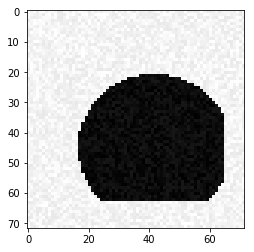

In [398]:
img = X_train[18].reshape(generator.IMAGE_SIZE, -1)
tgt = Y_train[18].reshape(generator.IMAGE_SIZE, -1)
plt.imshow(img, cmap='gray')

In [399]:
denoised = hourglass_model.predict(img[np.newaxis, :, :, np.newaxis])

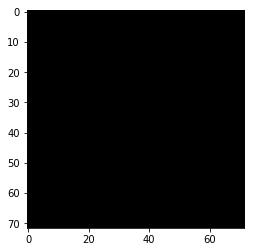

In [400]:
plt.imshow(denoised.reshape(generator.IMAGE_SIZE, -1), cmap='gray')

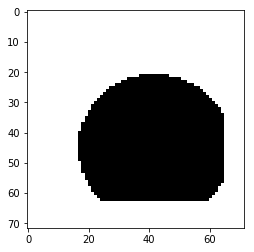

In [345]:
plt.imshow(tgt, cmap='gray')